Tiền xử lí dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df=pd.read_excel(r"/content/drive/MyDrive/Project/thuoc.xlsx")

df = pd.DataFrame(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5427 entries, 0 to 5426
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5427 non-null   int64 
 1   Tên thuốc            5427 non-null   object
 2   Danh mục             5427 non-null   object
 3   Dạng bào chế         5427 non-null   object
 4   Quy cách             5427 non-null   object
 5   Thành phần           5427 non-null   object
 6   Chỉ định             5427 non-null   object
 7   Chống chỉ định       5427 non-null   object
 8   Nhà sản xuất         5427 non-null   object
 9   Nước sản xuất        5427 non-null   object
 10  Xuất xứ thương hiệu  5427 non-null   object
 11  Thuốc cần kê toa     5427 non-null   object
 12  Đối tượng sử dụng    5427 non-null   object
 13  Loại thuốc           5427 non-null   object
dtypes: int64(1), object(13)
memory usage: 593.7+ KB


tiền xử lí dữ liệu

In [ ]:
import re

# Tên cột chứa dữ liệu ban đầu
original_column = "Tên thuốc"

# Hàm tách tên chính
def extract_main_name(text):
    # Bỏ từ đầu tiên
    text = " ".join(text.split()[1:])

    # Dò tìm cụm từ chính (bao gồm số, ký tự đặc biệt)
    matches = re.findall(r'\b[A-ZĐẮẲẴẪẾỆÚỨỬỮÓÒÕỌÔỐỘỞỠÝỶỸÀÁẠÃẢĂÂÊÔƠƯ][a-záàảãạăắằẳẵâấầẩẫậéèẻẽẹêếềểễệíìỉĩịóòỏõọôốồổỗộơớờởỡợúùủũụưứừửữựýỳỷỹỵA-Z0-9\-\'%\.]*|\d+[%mg/]+', text)

    if not matches:
        return text.strip()

    return " ".join(matches).strip()

# Hàm tách công dụng
def extract_usage(text, main_name):
    # Tìm vị trí tên chính trong câu ban đầu
    main_name_position = text.find(main_name)

    if main_name_position != -1:
        # Lấy phần sau tên chính
        remaining_text = text[main_name_position + len(main_name):].strip()
        # Loại bỏ các từ dư thừa đầu câu (nếu cần)
        return remaining_text.strip()
    else:
        # Nếu không tìm thấy tên chính, trả về toàn bộ câu
        return text.strip()


# Tạo cột "tên chính"
df["tên chính"] = df[original_column].apply(extract_main_name)

# Tạo cột "công dụng"
df["công dụng"] = df.apply(lambda row: extract_usage(row[original_column], row["tên chính"]), axis=1)

In [ ]:
df[['tên chính']].head(10)

,tên chính
0,Emla 5% Aspen
1,Xylocaine Jelly 2% AstraZeneca
2,Lidocain 10% Egis
3,Xương Khớp Trường Phúc
4,Calcid Soft Calci Vitamin D
5,Calcium D S.Pharm
6,Glucosamine Stada 1500mg
7,Viartril-S 1500mg Rottapharm
8,Calcium Hasan 500mg
9,Briozcal Bridge Healthcare D3


In [ ]:
df[['công dụng']].head(10)

,công dụng
0,gây tê bề mặt da
1,gây tê bôi trơn bề mặt
2,dùng trong chỉ định gây tê tại chỗ
3,dùng cho can thận hư phong hàn thấp
4,Thuốc Calcid Soft cung cấp Calci và Vitamin D ...
5,Thuốc Calcium - D S.Pharm bổ sung calxi điều t...
6,hỗ trợ giảm triệu chứng của thoái hóa khớp gối
7,giảm triệu chứng thoái hóa khớp nhẹ và trung bình
8,phòng và hỗ trợ điều trị bệnh loãng xương
9,Thuốc Briozcal Bridge Healthcare dự phòng và đ...


In [ ]:
unique_values = df['Dạng bào chế'].unique()
unique_values

array(['kem', 'gel', 'thuốc phun mù', 'viên nén bao phim',
       'viên nang mềm', 'bột', 'bột pha dung dịch uống', 'viên sủi',
       'hoàn cứng', 'viên nén', 'viên nang cứng', 'dung dịch', 'siro',
       'dung dịch uống', 'cốm', 'viên nén sủi bọt',
       'thuốc bột pha hỗn dịch uống', 'viên nén bao đường', 'viên nang',
       'dung dịch tiêm', 'thuốc tiêm', 'cao', 'dầu', 'miếng dán',
       'nhũ tương (gel)', 'dung dịch dùng ngoài', 'cao dán', 'thuốc mỡ',
       'kem bôi da', 'khí dung', 'xịt', 'hỗn dịch uống',
       'bột pha hỗn dịch uống', 'cốm pha dung dịch uống',
       'dung dịch bơm trực tràng', 'viên nén bao phim tan trong ruột',
       'hỗn dịch', 'bọt', 'dung dịch thụt trực tràng',
       'nhũ tương uống nhỏ giọt', 'viên nén nhai',
       'hỗn dịch uống nhỏ giọt', 'viên nén bao',
       'viên nén bao đường tan trong ruột', 'viên nhai', 'thuốc bột uống',
       'gel uống', 'cốm pha hỗn dịch uống', 'viên bao đường',
       'viên nang cứng chứa vi hạt bao tan trong ruột',
   

In [ ]:
df['Dạng bào chế'] = df['Dạng bào chế'].str.replace(r'\bdạng\b', '', case=False, regex=True).str.strip()

In [ ]:
df.head(10)

,Unnamed: 0,Tên thuốc,Danh mục,Dạng bào chế,Quy cách,Thành phần,Chỉ định,Chống chỉ định,Nhà sản xuất,Nước sản xuất,Xuất xứ thương hiệu,Thuốc cần kê toa,Đối tượng sử dụng,Loại thuốc,tên chính,công dụng
0,0,Thuốc Emla 5% Aspen gây tê bề mặt da,thuốc tê bôi,kem,hộp 5 tuýp,"lidocain, prilocain",cần tham vấn ý kiến y bác sĩ,cần tham vấn ý kiến y bác sĩ,Recipharm Karlskoga AB,Thụy Điển,Anh,có,"trẻ em, người lớn",là thuốc kê toa,Emla 5% Aspen,gây tê bề mặt da
1,1,Gel Xylocaine Jelly 2% AstraZeneca gây tê bôi ...,thuốc tê bôi,gel,tuýp,lidocain hydroclorid khan,"viêm bàng quang, viêm niệu đạo","suy thận, rối loạn chuyển hóa porphyrin",Astra,Anh,Anh,có,cần tham vấn ý kiến y bác sĩ,là thuốc kê toa,Xylocaine Jelly 2% AstraZeneca,gây tê bôi trơn bề mặt
2,2,Thuốc phun mù Lidocain 10% Egis dùng trong chỉ...,thuốc tê bôi,thuốc phun mù,lọ,lidocaine,"rối loạn nhịp tim, loét thực quản","nhược cơ, block nhĩ thất",Egis,Hungary,Hungary,có,cần tham vấn ý kiến y bác sĩ,là thuốc kê toa,Lidocain 10% Egis,dùng trong chỉ định gây tê tại chỗ
3,3,Thuốc Xương Khớp Trường Phúc dùng cho can thận...,thuốc xương khớp,viên nén bao phim,hộp 2 vỉ x 10 viên,"phòng phong, độc hoạt, tang ký sinh, tần giao,...",cần tham vấn ý kiến y bác sĩ,cần tham vấn ý kiến y bác sĩ,CÔNG TY TNHH DƯỢC THẢO HOÀNG THÀNH,Việt Nam,Việt Nam,không,cần tham vấn ý kiến y bác sĩ,không phải thuốc kê toa,Xương Khớp Trường Phúc,dùng cho can thận hư phong hàn thấp
4,4,Thuốc Calcid Soft cung cấp Calci và Vitamin D ...,thuốc xương khớp,viên nang mềm,hộp 10 vỉ x 10 viên,"calci carbonat, vitamin d3","hạ canxi huyết, loãng xương, còi xương","sỏi thận, tăng canxi máu, tăng canxi niệu",USA - NIC PHARMA,Việt Nam,Việt Nam,không,"phụ nữ có thai, người cao tuổi, phụ nữ cho con...",không phải thuốc kê toa,Calcid Soft Calci Vitamin D,Thuốc Calcid Soft cung cấp Calci và Vitamin D ...
5,5,Thuốc Calcium - D S.Pharm bổ sung calxi điều t...,thuốc xương khớp,viên nén bao phim,hộp 10 vỉ x 10 viên,"calci gluconat, vitamin d3",cần tham vấn ý kiến y bác sĩ,cần tham vấn ý kiến y bác sĩ,S.PHARM,Việt Nam,Việt Nam,không,cần tham vấn ý kiến y bác sĩ,không phải thuốc kê toa,Calcium D S.Pharm,Thuốc Calcium - D S.Pharm bổ sung calxi điều t...
6,6,Thuốc Glucosamine Stada 1500mg hỗ trợ giảm t...,thuốc trị thoái hoá khớp,bột,hộp 30 gói,"glucosamine, tá dược vừa đủ",cần tham vấn ý kiến y bác sĩ,cần tham vấn ý kiến y bác sĩ,STADA,Việt Nam,Việt Nam,không,cần tham vấn ý kiến y bác sĩ,không phải thuốc kê toa,Glucosamine Stada 1500mg,hỗ trợ giảm triệu chứng của thoái hóa khớp gối
7,7,Bột pha uống Viartril-S 1500mg Rottapharm giảm...,thuốc xương khớp,bột pha dung dịch uống,hộp 30 gói,glucosamin sulfate,cần tham vấn ý kiến y bác sĩ,cần tham vấn ý kiến y bác sĩ,Rottapharm,Ý,Ý,không,người cao tuổi,không phải thuốc kê toa,Viartril-S 1500mg Rottapharm,giảm triệu chứng thoái hóa khớp nhẹ và trung bình
8,8,Viên sủi Calcium Hasan 500mg phòng và hỗ trợ đ...,thuốc xương khớp,viên sủi,tuýp 20 viên,"calci lactat, calci carbonat","mang thai, dậy thì, loãng xương, còi xương","tăng canxi máu, tăng canxi niệu, dị ứng thuốc",HASAN,Việt Nam,Việt Nam,không,cần tham vấn ý kiến y bác sĩ,không phải thuốc kê toa,Calcium Hasan 500mg,phòng và hỗ trợ điều trị bệnh loãng xương
9,9,Thuốc Briozcal Bridge Healthcare dự phòng và đ...,thuốc xương khớp,viên nén bao phim,hộp 3 vỉ x 10 viên,"calci carbonat, cholecalciferol",cần tham vấn ý kiến y bác sĩ,cần tham vấn ý kiến y bác sĩ,Lipa Pharmaceuticals Ltd.,Úc,Chưa rõ,không,cần tham vấn ý kiến y bác sĩ,không phải thuốc kê toa,Briozcal Bridge Healthcare D3,Thuốc Briozcal Bridge Healthcare dự phòng và đ...


In [ ]:
pd.set_option('display.max_colwidth', None)  # Hiển thị toàn bộ nội dung trong các cột

In [ ]:
import numpy as np
df['Loại thuốc'] = np.where(
    df['Thuốc cần kê toa'].str.lower() == 'có',  # Kiểm tra nếu giá trị là "có" (không phân biệt hoa/thường)
    ", là thuốc kê toa",  # Nếu đúng
    ", không phải thuốc kê toa"  # Nếu sai
)

In [ ]:
df['câu_ghép'] = (
    "Thuốc " + df['tên chính'] + " loại " + df['Quy cách'] +" dạng " + df['Dạng bào chế']+
     " có thành phần là " + df['Thành phần'] + " có công dụng: " + df['công dụng'] + " "
    + df['Loại thuốc']+
    " do " + df['Nhà sản xuất'] + " sản xuất tại " + df['Nước sản xuất']
)

# Xuất ra dataframe mới với cột câu_ghép

In [ ]:
df[['câu_ghép']].head(10)

,câu_ghép
0,"Thuốc Emla 5% Aspen loại hộp 5 tuýp dạng kem có thành phần là lidocain, prilocain có công dụng: gây tê bề mặt da , là thuốc kê toa do Recipharm Karlskoga AB sản xuất tại Thụy Điển"
1,"Thuốc Xylocaine Jelly 2% AstraZeneca loại tuýp dạng gel có thành phần là lidocain hydroclorid khan có công dụng: gây tê bôi trơn bề mặt , là thuốc kê toa do Astra sản xuất tại Anh"
2,"Thuốc Lidocain 10% Egis loại lọ dạng thuốc phun mù có thành phần là lidocaine có công dụng: dùng trong chỉ định gây tê tại chỗ , là thuốc kê toa do Egis sản xuất tại Hungary"
3,"Thuốc Xương Khớp Trường Phúc loại hộp 2 vỉ x 10 viên dạng viên nén bao phim có thành phần là phòng phong, độc hoạt, tang ký sinh, tần giao, tế tân, bạch linh, ngưu tất rễ, đỗ trọng, bạch thược, quế chi, đảng sâm, sinh địa, xuyên khung, đương quy, cam thảo có công dụng: dùng cho can thận hư phong hàn thấp , không phải thuốc kê toa do CÔNG TY TNHH DƯỢC THẢO HOÀNG THÀNH sản xuất tại Việt Nam"
4,"Thuốc Calcid Soft Calci Vitamin D loại hộp 10 vỉ x 10 viên dạng viên nang mềm có thành phần là calci carbonat, vitamin d3 có công dụng: Thuốc Calcid Soft cung cấp Calci và Vitamin D giúp xương chắc khỏe , không phải thuốc kê toa do USA - NIC PHARMA sản xuất tại Việt Nam"
5,"Thuốc Calcium D S.Pharm loại hộp 10 vỉ x 10 viên dạng viên nén bao phim có thành phần là calci gluconat, vitamin d3 có công dụng: Thuốc Calcium - D S.Pharm bổ sung calxi điều trị loãng xương còi xương , không phải thuốc kê toa do S.PHARM sản xuất tại Việt Nam"
6,"Thuốc Glucosamine Stada 1500mg loại hộp 30 gói dạng bột có thành phần là glucosamine, tá dược vừa đủ có công dụng: hỗ trợ giảm triệu chứng của thoái hóa khớp gối , không phải thuốc kê toa do STADA sản xuất tại Việt Nam"
7,"Thuốc Viartril-S 1500mg Rottapharm loại hộp 30 gói dạng bột pha dung dịch uống có thành phần là glucosamin sulfate có công dụng: giảm triệu chứng thoái hóa khớp nhẹ và trung bình , không phải thuốc kê toa do Rottapharm sản xuất tại Ý"
8,"Thuốc Calcium Hasan 500mg loại tuýp 20 viên dạng viên sủi có thành phần là calci lactat, calci carbonat có công dụng: phòng và hỗ trợ điều trị bệnh loãng xương , không phải thuốc kê toa do HASAN sản xuất tại Việt Nam"
9,"Thuốc Briozcal Bridge Healthcare D3 loại hộp 3 vỉ x 10 viên dạng viên nén bao phim có thành phần là calci carbonat, cholecalciferol có công dụng: Thuốc Briozcal Bridge Healthcare dự phòng và điều trị thiếu hụt calci vitamin D3 , không phải thuốc kê toa do Lipa Pharmaceuticals Ltd. sản xuất tại Úc"


In [ ]:
!pip install underthesea==1.3.5 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.2/591.2 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 18.2 MB/s eta 0:00:00


In [ ]:

import re
from underthesea import word_tokenize

# Hàm chuẩn hóa và tách từ văn bản
def preprocess_text(text):
    # Loại bỏ các ký tự không phải là chữ cái và số (giữ lại dấu câu nếu cần)
    # Dùng underthesea để tách từ tiếng Việt
    return " ".join(word_tokenize(text))

# Lấy danh sách các câu từ cột 'câu_ghép'
sentences = df['câu_ghép'].tolist()

# Kiểm tra số lượng câu
print(f"Số lượng câu: {len(sentences )}")

Số lượng câu: 5427


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


xây dựng model

In [ ]:
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import DataCollatorForLanguageModeling
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, RobertaForMaskedLM
import torch

# Chuẩn hóa văn bản trước khi tạo Dataset
sentences = [preprocess_text(sentence) for sentence in sentences]

# Chia tập dữ liệu thành train và test (80% train, 20% test)
train_sentences, test_sentences = train_test_split(sentences, test_size=0.2, random_state=42)

# Chuyển dữ liệu thành Dataset
train_data = Dataset.from_dict({"text": train_sentences})
test_data = Dataset.from_dict({"text": test_sentences})

# Load tokenizer và model PhoBERT (Sử dụng RoBERTa cho PhoBERT)
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
model = RobertaForMaskedLM.from_pretrained("vinai/phobert-base", ignore_mismatched_sizes=True)  # Thêm tham số ignore_mismatched_sizes=True

# Tokenize dữ liệu
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

# Tokenize tập train và test
tokenized_train_data = train_data.map(tokenize_function, batched=True, remove_columns=["text"])
tokenized_test_data = test_data.map(tokenize_function, batched=True, remove_columns=["text"])

# Chuyển đổi tokenized data thành dạng PyTorch Dataset
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, tokenized_data):
        self.input_ids = tokenized_data["input_ids"]
        self.attention_mask = tokenized_data["attention_mask"]
        self.labels = tokenized_data["input_ids"]  # labels cho Masked Language Modeling (MLM)

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.input_ids[idx]),
            "attention_mask": torch.tensor(self.attention_mask[idx]),
            "labels": torch.tensor(self.labels[idx]),
        }

train_dataset = CustomDataset(tokenized_train_data)
test_dataset = CustomDataset(tokenized_test_data)

# Định nghĩa DataCollator và DataLoader cho train và test
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True,
    mlm_probability=0.15
)

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=32, collate_fn=data_collator)
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=32, collate_fn=data_collator)

# In thử một batch từ train_dataloader để kiểm tra
for batch in train_dataloader:
    print(batch)
    break


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Map:   0%|          | 0/4341 [00:00<?, ? examples/s]

Map:   0%|          | 0/1086 [00:00<?, ? examples/s]

{'input_ids': tensor([[    0,  9284,  3874,  ...,     1,     1,     1],
        [    0,  9284,  1241,  ...,     1,     1,     1],
        [    0,  9284, 43992,  ...,     1,     1,     1],
        ...,
        [    0,  9284,  1622,  ...,     1,     1,     1],
        [    0,  9284, 10043,  ...,     1,     1,     1],
        [    0,  9284, 64000,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([[ -100,  -100,  -100,  ...,  -100,  -100,  -100],
        [ -100,  -100,  -100,  ...,  -100,  -100,  -100],
        [ -100,  -100,  -100,  ...,  -100,  -100,  -100],
        ...,
        [ -100,  9284,  -100,  ...,  -100,  -100,  -100],
        [ -100,  -100,  -100,  ...,  -100,  -100,  -100],
        [ -100,  -100, 20279,  ...,  -100,  -100,  -100]])}


huẩn luyện

In [ ]:
import torch
from torch.cuda.amp import GradScaler, autocast
from torch.optim.lr_scheduler import OneCycleLR
from torch.backends import cudnn
from transformers import RobertaForMaskedLM
import json

# Tăng tốc CUDNN
cudnn.benchmark = True

# Khởi tạo mô hình (PhoBERT đã được tải trước đó)
model = RobertaForMaskedLM.from_pretrained("vinai/phobert-base", ignore_mismatched_sizes=True)
model.train()

# Định nghĩa thiết bị
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Các tham số huấn luyện
epochs = 30
best_loss = float('inf')
patience = 2
no_improve_epochs = 0
gradient_accumulation_steps = 2

# Danh sách để lưu loss
train_losses = []
test_losses = []

# Định nghĩa optimizer và scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
scheduler = OneCycleLR(optimizer, max_lr=5e-5, steps_per_epoch=len(train_dataloader), epochs=epochs)

# GradScaler cho Mixed Precision
scaler = GradScaler()

# Bắt đầu huấn luyện
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}")
    epoch_loss = 0.0

    # Huấn luyện
    model.train()
    for step, batch in enumerate(train_dataloader):
        # Chuyển dữ liệu batch lên thiết bị
        inputs = {
            "input_ids": batch["input_ids"].to(device),
            "attention_mask": batch["attention_mask"].to(device),
            "labels": batch["labels"].to(device),
        }
        optimizer.zero_grad()

        # Sử dụng AMP để tăng tốc
        with autocast():
            outputs = model(**inputs)
            loss = outputs.loss / gradient_accumulation_steps

        scaler.scale(loss).backward()

        if (step + 1) % gradient_accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()

        epoch_loss += loss.item()

        if step % 10 == 0:
            print(f"Step {step}, Loss: {loss.item()}")

    avg_epoch_loss = epoch_loss / len(train_dataloader)
    train_losses.append(avg_epoch_loss)
    print(f"Epoch {epoch + 1} Training Loss: {avg_epoch_loss}")

    # Đánh giá trên tập Test
    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for batch in test_dataloader:
            inputs = {
                "input_ids": batch["input_ids"].to(device),
                "attention_mask": batch["attention_mask"].to(device),
                "labels": batch["labels"].to(device),
            }
            with autocast():
                outputs = model(**inputs)
                test_loss += outputs.loss.item()

    avg_test_loss = test_loss / len(test_dataloader)
    test_losses.append(avg_test_loss)
    print(f"Epoch {epoch + 1} Test Loss: {avg_test_loss}")

    scheduler.step()

    # Lưu mô hình tốt nhất
    if avg_test_loss < best_loss:
        best_loss = avg_test_loss
        no_improve_epochs = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        no_improve_epochs += 1

    # Dừng sớm nếu không cải thiện
    if no_improve_epochs >= patience:
        print("Early stopping triggered. Training stopped.")
        break

# Lưu Loss vào file JSON
path = '/content/drive/MyDrive/Project/model/losses.json'

with open(path, 'w') as f:
    json.dump({"train_losses": train_losses, "test_losses": test_losses}, f)



Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
<ipython-input-24-c83fdadb2700>:35: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()
<ipython-input-24-c83fdadb2700>:54: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with auto

Epoch 1
Step 0, Loss: 1.9535475969314575
Step 10, Loss: 1.8211592435836792
Step 20, Loss: 1.8319122791290283
Step 30, Loss: 1.4488821029663086
Step 40, Loss: 1.4472712278366089
Step 50, Loss: 1.3433281183242798
Step 60, Loss: 1.411179542541504
Step 70, Loss: 1.542755365371704
Step 80, Loss: 1.3035907745361328
Step 90, Loss: 1.4536489248275757
Step 100, Loss: 1.3071621656417847
Step 110, Loss: 1.3156594038009644
Step 120, Loss: 1.0941376686096191
Step 130, Loss: 1.4666351079940796
Epoch 1 Training Loss: 1.5124219208955765


<ipython-input-24-c83fdadb2700>:83: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1 Test Loss: 2.2469218127867756
Epoch 2
Step 0, Loss: 1.2654473781585693
Step 10, Loss: 1.250453233718872
Step 20, Loss: 1.10891592502594
Step 30, Loss: 1.1456998586654663
Step 40, Loss: 1.282315731048584
Step 50, Loss: 1.0904066562652588
Step 60, Loss: 1.1853325366973877
Step 70, Loss: 1.0383654832839966
Step 80, Loss: 1.182295799255371
Step 90, Loss: 1.0723729133605957
Step 100, Loss: 1.1435034275054932
Step 110, Loss: 1.1837589740753174
Step 120, Loss: 1.1035393476486206
Step 130, Loss: 1.1713942289352417
Epoch 2 Training Loss: 1.1861871708841885
Epoch 2 Test Loss: 1.9827918375239653
Epoch 3
Step 0, Loss: 1.0215917825698853
Step 10, Loss: 1.2414685487747192
Step 20, Loss: 1.1137720346450806
Step 30, Loss: 0.9619501829147339
Step 40, Loss: 0.9165134429931641
Step 50, Loss: 1.0144782066345215
Step 60, Loss: 1.080628752708435
Step 70, Loss: 1.001826286315918
Step 80, Loss: 1.3070071935653687
Step 90, Loss: 1.212632179260254
Step 100, Loss: 1.0076987743377686
Step 110, Loss: 1.140

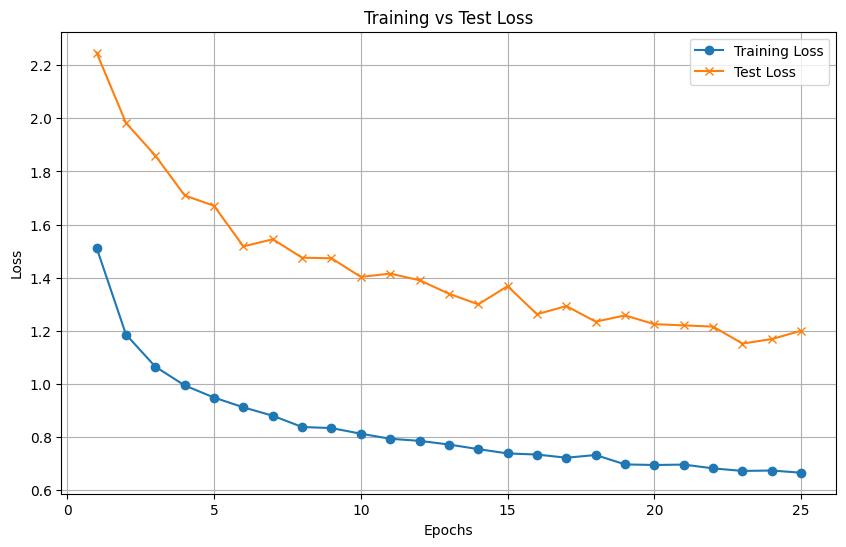

In [ ]:
import json
import matplotlib.pyplot as plt

# Đọc file JSON từ Drive
path = '/content/drive/MyDrive/Project/model/losses.json'
with open(path, 'r') as f:
    data = json.load(f)

train_losses = data["train_losses"]
test_losses = data["test_losses"]

epochs = range(1, len(train_losses) + 1)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='x')

plt.title('Training vs Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


lưu checkpoint

In [ ]:
import pickle
import torch
import os
from transformers import AutoTokenizer

# Tạo thư mục lưu model và tokenizer
model_dir = '/content/drive/MyDrive/Project/model/'
os.makedirs(model_dir, exist_ok=True)

# Lưu model PhoBERT
model_save_path = os.path.join(model_dir, 'phobert-mlm-trained.pth')
torch.save(model.state_dict(), model_save_path)

# Lưu tokenizer (đảm bảo lấy từ checkpoint gốc)
tokenizer_save_path = os.path.join(model_dir, 'phobert-mlm-tokenizer')
os.makedirs(tokenizer_save_path, exist_ok=True)
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')
tokenizer.save_pretrained(tokenizer_save_path)

# Lưu các biến khác
variables = {
    'train_dataset': train_dataset,
    'test_dataset': test_dataset,
    'train_dataloader': train_dataloader,
    'test_dataloader': test_dataloader,
    'data_collator': data_collator
}

variables_path = os.path.join(model_dir, 'variables.pkl')
with open(variables_path, 'wb') as f:
    pickle.dump(variables, f)

print("✅ PhoBERT model, tokenizer và các biến đã được lưu thành công!")


✅ PhoBERT model, tokenizer và các biến đã được lưu thành công!


In [ ]:
import torch

# Định nghĩa lớp CustomDataset
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, tokenized_data):
        self.input_ids = tokenized_data["input_ids"]
        self.attention_mask = tokenized_data["attention_mask"]
        self.labels = tokenized_data["input_ids"]  # labels cho Masked Language Modeling (MLM)

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.input_ids[idx]),
            "attention_mask": torch.tensor(self.attention_mask[idx]),
            "labels": torch.tensor(self.labels[idx]),
        }


gọi model lên

In [ ]:
import torch
import os
from transformers import AutoTokenizer, RobertaForMaskedLM
import pickle

# Tải model PhoBERT
model_dir = '/content/drive/MyDrive/Project/model/'
model = RobertaForMaskedLM.from_pretrained('vinai/phobert-base', ignore_mismatched_sizes=True)
model.load_state_dict(torch.load(os.path.join(model_dir, 'phobert-mlm-trained.pth')))
model.eval()

# Tải tokenizer
tokenizer = AutoTokenizer.from_pretrained(os.path.join(model_dir, 'phobert-mlm-tokenizer'))

# Tải các biến khác
with open(os.path.join(model_dir, 'variables.pkl'), 'rb') as f:
    variables = pickle.load(f)

# Gán lại các biến
train_dataset = variables['train_dataset']
test_dataset = variables['test_dataset']
train_dataloader = variables['train_dataloader']
test_dataloader = variables['test_dataloader']
data_collator = variables['data_collator']

print("✅ PhoBERT model, tokenizer và các biến đã được tải lại thành công!")


Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
<ipython-input-29-ca55cba687d1>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-mo

✅ PhoBERT model, tokenizer và các biến đã được tải lại thành công!


test

In [ ]:
import random
import torch

# ✅ Xác định thiết bị (CPU hoặc GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# ✅ Hàm Lấy Câu Từ Dataset
def extract_sentences_from_dataset(dataset, num_samples=10):
    indices = random.sample(range(len(dataset)), min(num_samples, len(dataset)))
    sentences = []
    for i in indices:
        input_ids = dataset[i]['input_ids']
        sentence = tokenizer.decode(input_ids, skip_special_tokens=True)
        sentences.append(sentence)
    return sentences

# ✅ Hàm Chèn Token [MASK]
def mask_random_word(sentence):
    words = sentence.split()
    maskable_indices = [i for i, word in enumerate(words) if word.isalnum() and word.lower() not in ["là", "có", "do", "tại"]]

    if maskable_indices:
        masked_index = random.choice(maskable_indices)
        words[masked_index] = tokenizer.mask_token  # Thêm token [MASK]
    return " ".join(words)

# ✅ Hàm Dự Đoán Từ Bị Mask
def predict_masked_words(sentences, num_samples=10):
    predictions = []
    sampled_sentences = random.sample(sentences, min(num_samples, len(sentences)))

    for sentence in sampled_sentences:
        print(f"Câu gốc: {sentence}")

        # Tạo câu có chứa [MASK]
        masked_sentence = mask_random_word(sentence)
        print(f"Câu đã mask: {masked_sentence}")

        # Tokenize câu và đảm bảo tensor trên cùng một device
        inputs = tokenizer(masked_sentence, return_tensors="pt", truncation=True, padding=True, max_length=128)
        inputs = {key: value.to(device) for key, value in inputs.items()}  # Chuyển tensor sang GPU nếu có

        # Dự đoán từ bị mask
        with torch.no_grad():
            outputs = model(**inputs)
            predictions_logits = outputs.logits

        # Lấy vị trí của token [MASK]
        mask_token_index = (inputs["input_ids"] == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]

        # Lấy token dự đoán
        predicted_token_id = predictions_logits[0, mask_token_index].argmax(dim=-1)
        predicted_token = tokenizer.decode(predicted_token_id)

        print(f"Từ dự đoán: {predicted_token}")
        predictions.append({
            "original_sentence": sentence,
            "masked_sentence": masked_sentence,
            "predicted_word": predicted_token
        })
        print("---")

    return predictions

# ✅ Lấy Câu Test từ Dataset
test_sentences = extract_sentences_from_dataset(test_dataset, num_samples=10)
print("✅ Đã lấy mẫu 5 câu từ test_dataset:")
for i, sentence in enumerate(test_sentences):
    print(f"{i+1}. {sentence}")

# ✅ Chạy Dự Đoán
results = predict_masked_words(test_sentences, num_samples=10)

# ✅ In Kết Quả Dự Đoán
print("Kết quả dự đoán:")
for result in results:
    print(f"Câu gốc: {result['original_sentence']}")
    print(f"Câu đã mask: {result['masked_sentence']}")
    print(f"Từ dự đoán: {result['predicted_word']}")
    print("---")


✅ Đã lấy mẫu 5 câu từ test_dataset:
1. Thuốc Amlodipin 5 mg Vidipha loại hộp 3 vỉ x 10 viên dạng viên nang cứng có thành phần là amlodipine có công dụng : điều trị tăng huyết áp đau thắt ngực , là thuốc kê toa do CÔNG TY CỔ PHẦN DƯỢC PHẨM T.Ư VIDIPHA sản xuất tại Việt Nam
2. Thuốc Huntelaar 4 mg Davi Pharm loại hộp 6 vỉ x 10 viên dạng viên nén bao phim có thành phần là lacidipine có công dụng : điều trị tăng huyết áp , là thuốc kê toa do CÔNG TY CỔ PHẨN ĐẠT VI PHÚ sản xuất tại Việt Nam
3. Thuốc Haginat DHG loại hộp 2 vỉ x 5 viên dạng viên nén bao phim có thành phần là cefuroxim có công dụng : Thuốc Haginat 500 DHG điều trị nhiễm khuẩn , là thuốc kê toa do DHG sản xuất tại Việt Nam
4. Thuốc Feburic 80 mg Astellas loại hộp 3 vỉ x 10 viên dạng viên nén bao phim có thành phần là febuxostat có công dụng : điều trị tăng acid uric huyết mạn tính , là thuốc kê toa do PATHEON sản xuất tại Pháp
5. Thuốc Vitamin C 500 mg Vidipha Vitamin C loại hộp 100 viên dạng viên nang cứng có thành phần là vit

dự đoán độ chính xác

In [ ]:
import nltk

# Tải wordnet từ NLTK
nltk.download('wordnet')
nltk.download('omw-1.4')  # Tải bộ ngôn ngữ mở rộng nếu cần


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import torch
import random
import re
from nltk.corpus import wordnet  # Thư viện để so sánh từ đồng nghĩa

# ✅ Xác định thiết bị (CPU hoặc GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# ✅ Hàm Kiểm Tra Đồng Nghĩa
def is_synonym(word1, word2):
    synonyms = set()
    for syn in wordnet.synsets(word1):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name().lower())
    return word2.lower() in synonyms

# ✅ Hàm Đánh Giá Độ Chính Xác Tối Ưu
def evaluate_accuracy(dataset, top_k=15):
    total = 0
    correct = 0

    for i in range(len(dataset)):
        # Giải mã input_ids thành câu gốc
        input_ids = dataset[i]['input_ids']
        sentence = tokenizer.decode(input_ids, skip_special_tokens=True)
        words = sentence.split()

        # Bỏ qua câu quá ngắn
        if len(words) <= 1:
            continue

        # Chọn từ hợp lệ để `[MASK]` (ưu tiên danh từ, động từ)
        maskable_indices = [
            i for i, word in enumerate(words)
            if word.isalnum() and len(word) > 2 and
            word.lower() not in ["là", "có", "do", "tại"]
        ]
        if not maskable_indices:
            continue

        masked_index = random.choice(maskable_indices)
        original_word = re.sub(r'[^\w\s]', '', words[masked_index])
        words[masked_index] = tokenizer.mask_token
        masked_sentence = " ".join(words)

        # Tokenize câu đã mask
        inputs = tokenizer(
            masked_sentence,
            return_tensors="pt",
            truncation=True,
            padding=True,
            max_length=512
        )
        inputs = {key: value.to(device) for key, value in inputs.items()}
        # Dự đoán từ bị mask
        with torch.no_grad():
            outputs = model(**inputs)
            predictions = outputs.logits

        # Lấy vị trí của token `[MASK]`
        mask_token_index = (inputs['input_ids'] == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]
        if mask_token_index.numel() == 0:
            continue  # Bỏ qua nếu không tìm thấy `[MASK]`

        # Lấy Top-K token dự đoán
        predicted_token_ids = predictions[0, mask_token_index[0]].topk(top_k).indices
        predicted_tokens = [tokenizer.decode(token_id).strip().lower() for token_id in predicted_token_ids]

        # So sánh từ dự đoán với từ gốc hoặc từ đồng nghĩa
        if original_word.lower() in predicted_tokens or any(is_synonym(original_word, pred) for pred in predicted_tokens):
            correct += 1

        total += 1

        # Hiển thị tiến trình mỗi 50 câu
        if total % 50 == 0:
            print(f" Đã xử lý {total} câu...")

    # Tính tỷ lệ chính xác
    accuracy = correct / total if total > 0 else 0
    print(f"✅ Tổng số câu đã đánh giá: {total}")
    print(f"✅ Số dự đoán đúng: {correct}")
    print(f"✅ Tỷ lệ đoán chính xác: {accuracy * 100:.2f}%")
    return accuracy

# ✅ Gọi Hàm Để Đánh Giá
accuracy = evaluate_accuracy(test_dataset, top_k=20)


 Đã xử lý 50 câu...
 Đã xử lý 100 câu...
 Đã xử lý 150 câu...
 Đã xử lý 200 câu...
 Đã xử lý 250 câu...
 Đã xử lý 300 câu...
 Đã xử lý 350 câu...
 Đã xử lý 400 câu...
 Đã xử lý 450 câu...
 Đã xử lý 500 câu...
 Đã xử lý 550 câu...
 Đã xử lý 600 câu...
 Đã xử lý 650 câu...
 Đã xử lý 700 câu...
 Đã xử lý 750 câu...
 Đã xử lý 800 câu...
 Đã xử lý 850 câu...
 Đã xử lý 900 câu...
 Đã xử lý 950 câu...
 Đã xử lý 1000 câu...
 Đã xử lý 1050 câu...
✅ Tổng số câu đã đánh giá: 1086
✅ Số dự đoán đúng: 878
✅ Tỷ lệ đoán chính xác: 80.85%
